<ipython-input-10-0721d3bc6d69>:81: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()


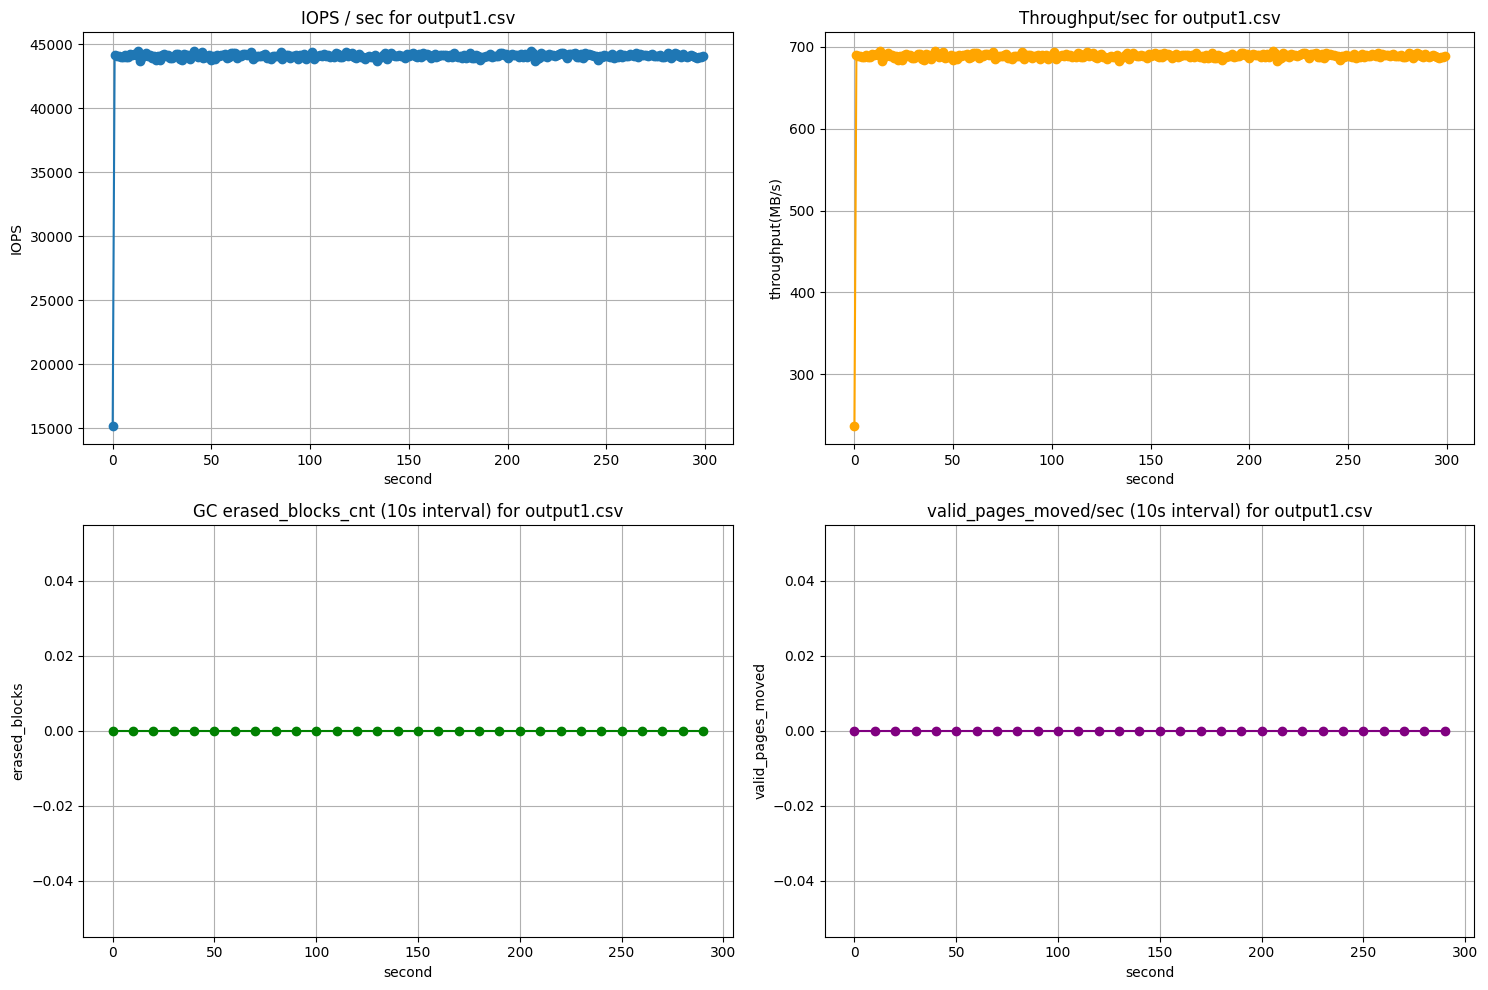

<ipython-input-10-0721d3bc6d69>:81: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()


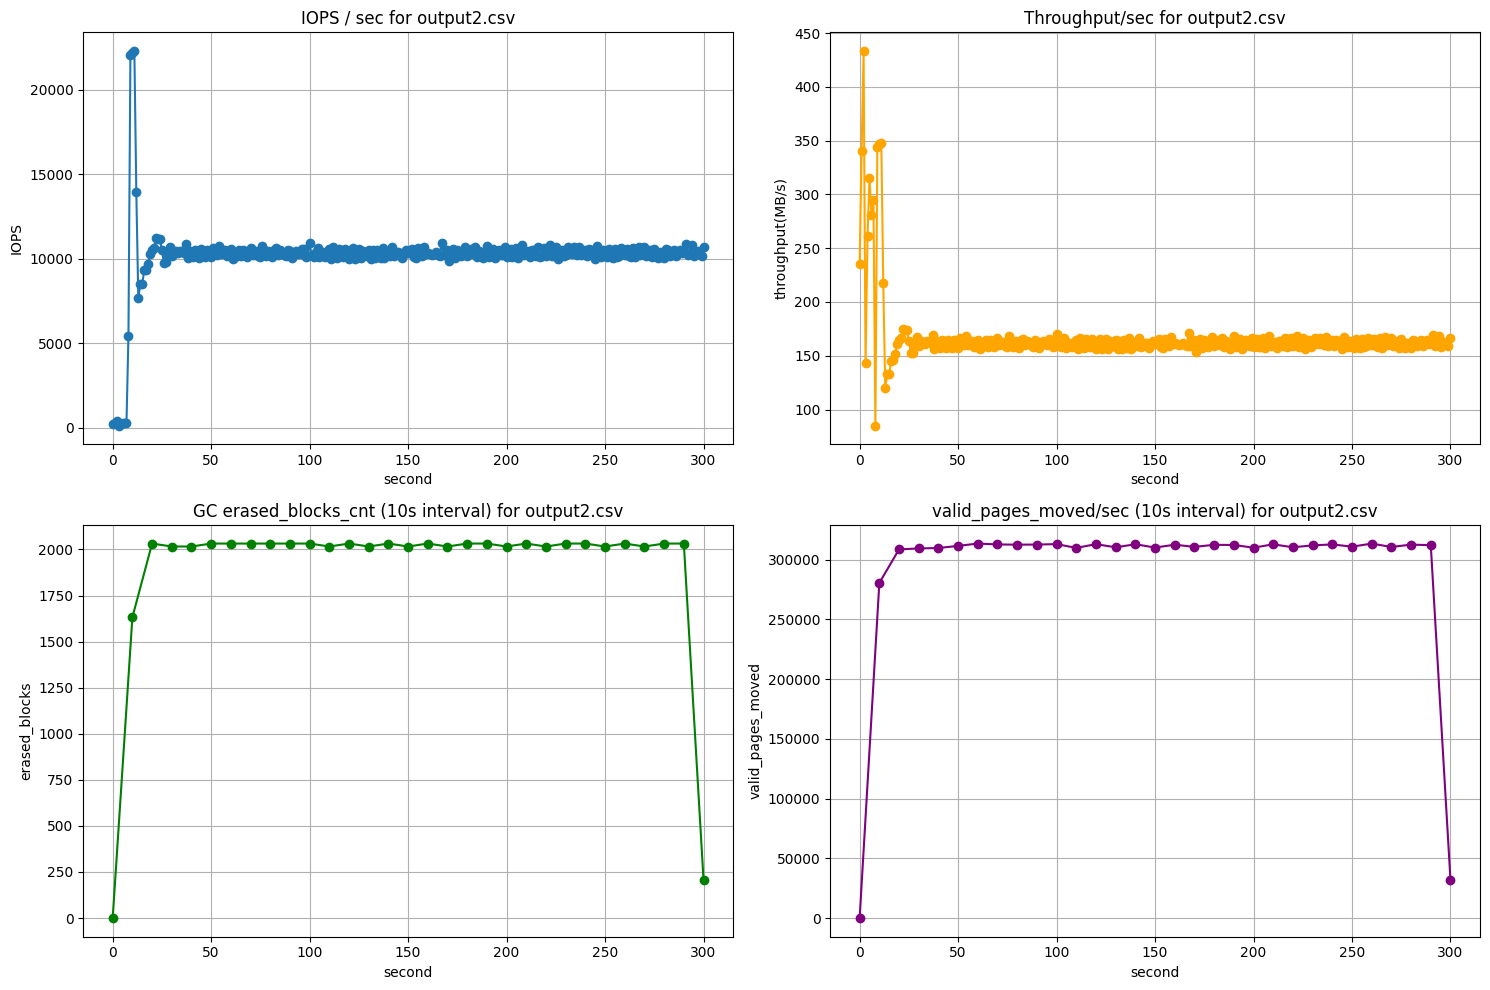

<ipython-input-10-0721d3bc6d69>:81: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()


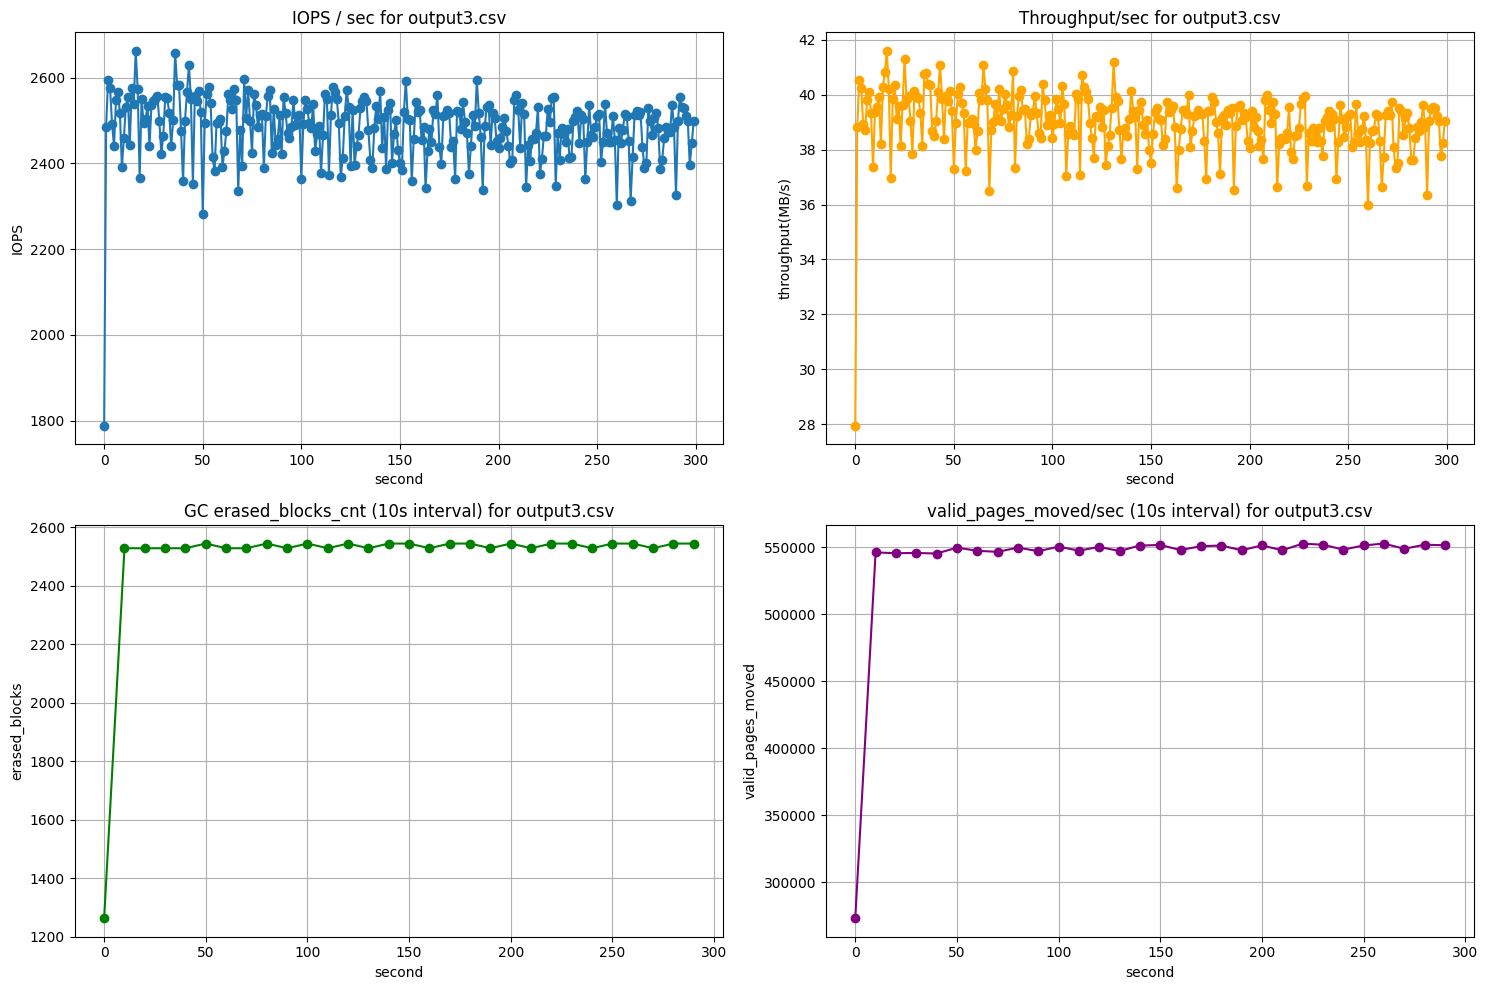

<ipython-input-10-0721d3bc6d69>:81: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()


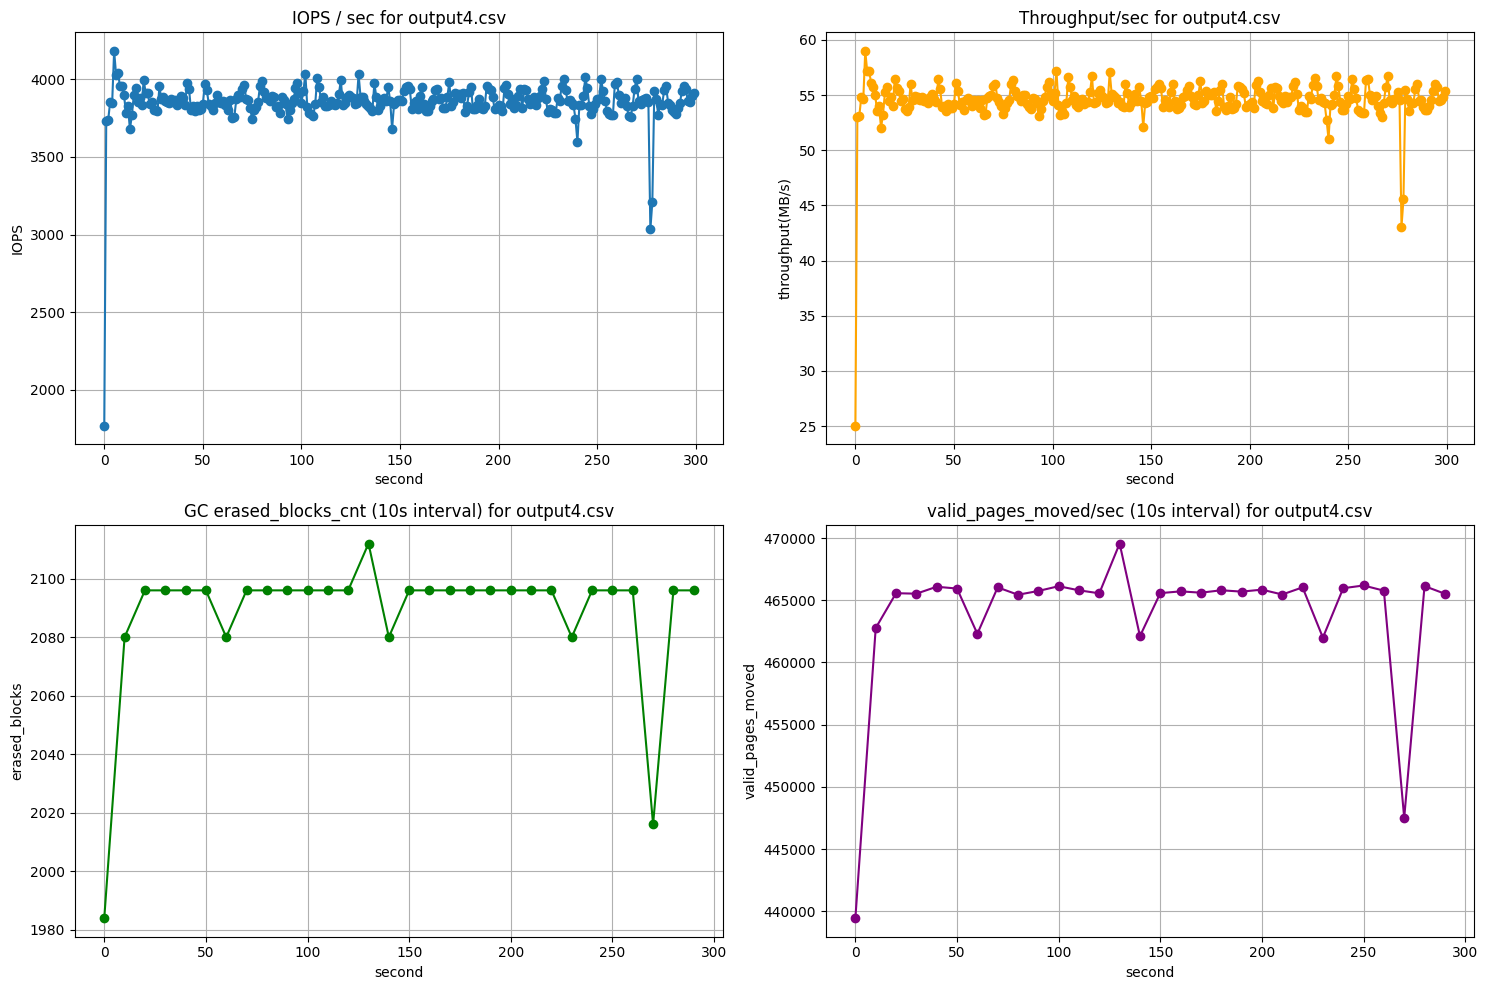

<ipython-input-10-0721d3bc6d69>:81: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()


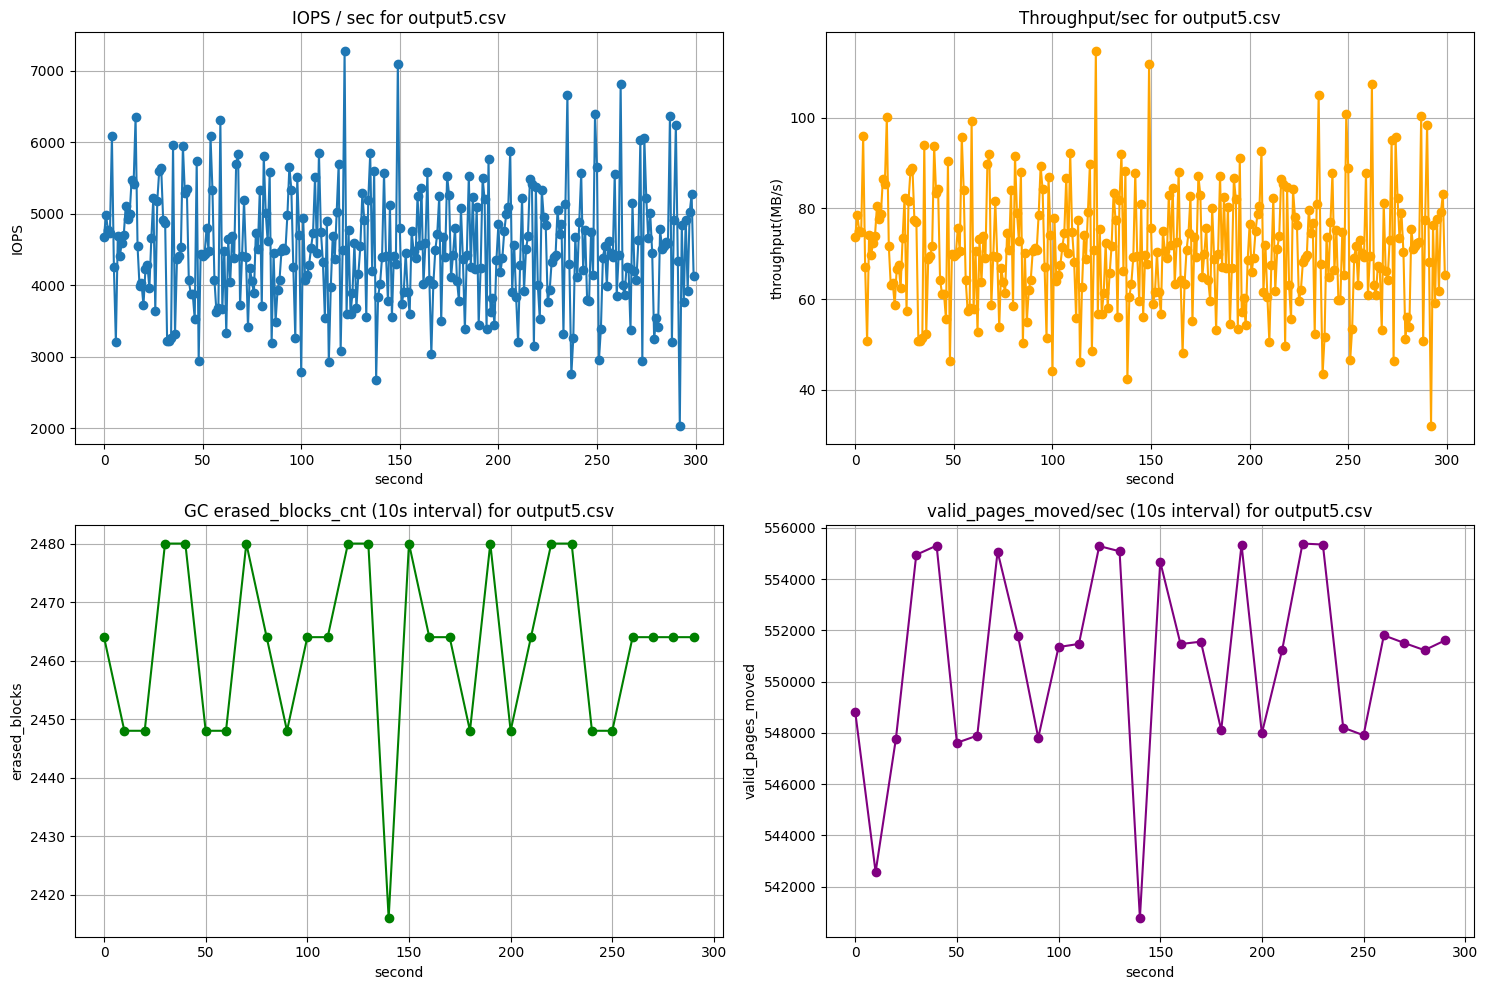

In [10]:
!pip install matplotlib pandas
import pandas as pd
import matplotlib.pyplot as plt

# List of file names to process
file_names = ['output1.csv', 'output2.csv', 'output3.csv',
              'output4.csv', 'output5.csv']

# Loop through each file
for file in file_names:
    # Read the CSV file
    df = pd.read_csv(file, names=['시간_초', 'iops', '처리량_mb_s', '삭제된_블록_수', 'valid_pages_moved'])

    # Adjust time to start from zero
    첫번째_시간_초 = df['시간_초'].iloc[0]
    df['시간_초'] = df['시간_초'] - 첫번째_시간_초

    # Convert '시간_초' to a TimedeltaIndex for 10-second resampling
    df['시간_초'] = pd.to_timedelta(df['시간_초'], unit='s')
    df.set_index('시간_초', inplace=True)

    # Resample every 10 seconds for '삭제된_블록_수' and 'valid_pages_moved' and calculate the mean
    df_resampled = df[['삭제된_블록_수', 'valid_pages_moved']].resample('10S').max()
    df_resampled.reset_index(inplace=True)
    df_resampled['시간_초'] = df_resampled['시간_초'].dt.total_seconds()  # Convert Timedelta back to seconds for plotting

    # Create a figure and 4 subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot iops
    axs[0, 0].plot(df.index.total_seconds(), df['iops'], marker='o')
    axs[0, 0].set_title(f'IOPS / sec for {file}')
    axs[0, 0].set_xlabel('second')
    axs[0, 0].set_ylabel('IOPS')
    axs[0, 0].grid(True)

    # Plot 처리량_mb_s
    axs[0, 1].plot(df.index.total_seconds(), df['처리량_mb_s'], color='orange', marker='o')
    axs[0, 1].set_title(f'Throughput/sec for {file}')
    axs[0, 1].set_xlabel('second')
    axs[0, 1].set_ylabel('throughput(MB/s)')
    axs[0, 1].grid(True)

    # Plot '삭제된_블록_수'
    axs[1, 0].plot(df_resampled['시간_초'], df_resampled['삭제된_블록_수'], color='green', marker='o')
    axs[1, 0].set_title(f'GC erased_blocks_cnt (10s interval) for {file}')
    axs[1, 0].set_xlabel('second')
    axs[1, 0].set_ylabel('erased_blocks')
    axs[1, 0].grid(True)

    # Plot 'valid_pages_moved'
    axs[1, 1].plot(df_resampled['시간_초'], df_resampled['valid_pages_moved'], color='purple', marker='o')
    axs[1, 1].set_title(f'valid_pages_moved/sec (10s interval) for {file}')
    axs[1, 1].set_xlabel('second')
    axs[1, 1].set_ylabel('valid_pages_moved')
    axs[1, 1].grid(True)

    # layout so plots do not overlap
    fig.tight_layout()

    # Show the plot
    plt.show()